In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

## Visualization

In [3]:
# Adaptado de https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

def plot_classifier_comparison(datasets, classifiers, h=0.02, fontsize=18):
    figure = plt.figure(figsize=(27, 9))
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                            random_state=42)

        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdGy
        c2, c1, *_ = sns.color_palette(as_cmap=True)
        cm_bright = ListedColormap([c1, c2])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Dataset", fontsize=fontsize)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1],
                   c=y_train, cmap=cm_bright, edgecolors="k")
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1],
                   c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, make_clf in classifiers.items():
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf = make_clf()
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color
            # to each point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

            # Plot the training points
            ax.scatter(X_train[:, 0], X_train[:, 1],
                       c=y_train, cmap=cm_bright, edgecolors="k")
            # Plot the testing points
            ax.scatter(X_test[:, 0], X_test[:, 1],
                       c=y_test, cmap=cm_bright, edgecolors="k", alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=fontsize)
            ax.text(xx.max() - 0.3, yy.min() + 0.3,
                    ("%.2f" % score).lstrip("0"),
                    size=15, horizontalalignment="right")
            i += 1

    plt.tight_layout()
    #plt.show()
    plt.savefig("classifiers.pdf")

## Config

In [4]:
def make_linearly_separable(*args, **kwargs):
    X, y = make_classification(*args, **kwargs)
    rng = np.random.RandomState(kwargs.get("random_state", 0)+1)
    X += 2 * rng.uniform(size=X.shape)
    return X, y

In [5]:
n_samples = 100

datasets = [
    make_moons(n_samples=n_samples, noise=0.3, random_state=0),
    make_circles(n_samples=n_samples, noise=0.2, factor=0.5, random_state=1),
    make_linearly_separable(n_samples=n_samples,
                            n_features=2, n_redundant=0, n_informative=2,
                            random_state=2, n_clusters_per_class=1),
]

In [6]:
classifiers = {
    "GNB":  lambda: Pipeline([("scaler", StandardScaler()), ("clf", GaussianNB())]),
    "SVC":  lambda: Pipeline([("scaler", StandardScaler()), ("clf", SVC(gamma=2, C=1, random_state=14))]),
    "MLPC": lambda: Pipeline([("scaler", StandardScaler()), ("clf", MLPClassifier(alpha=1, max_iter=1000, random_state=13))]),
    "ABC":  lambda: Pipeline([("scaler", StandardScaler()), ("clf", AdaBoostClassifier(random_state=10))]),
    "RFC":  lambda: Pipeline([("scaler", StandardScaler()), ("clf", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=12))]),
}

## Evaluation

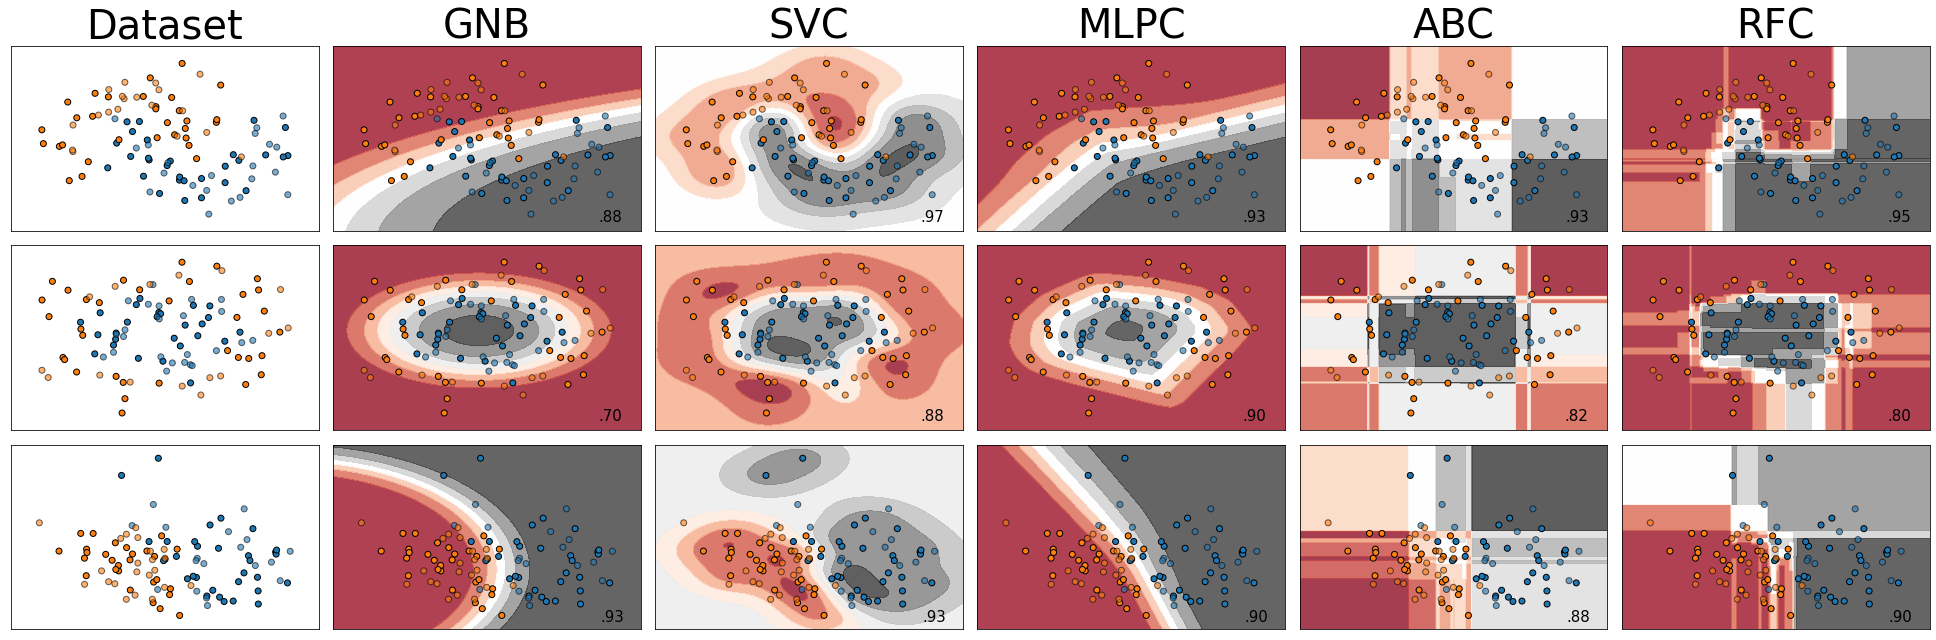

In [8]:
plot_classifier_comparison(datasets, classifiers, fontsize=40)

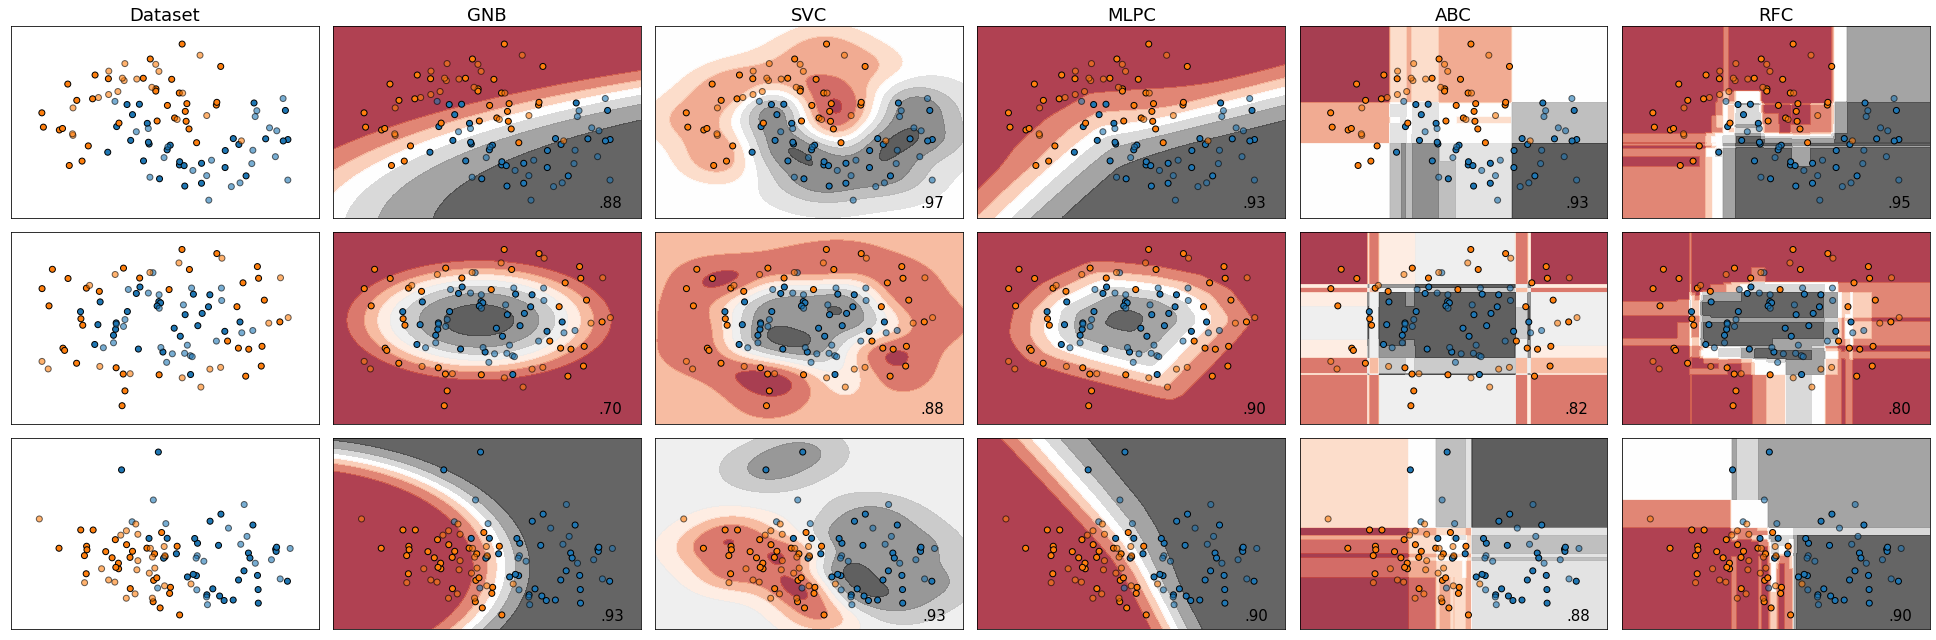

In [ ]:
plot_classifier_comparison(datasets, classifiers)